1. [Multinomial Naive Bayes](#multinomial-naive-bayes)

#### Multinomial Naive Bayes:
- used when we have text data at hand or NLP scenarios
- create ```dictionary/vocalbulary of words``` w.r.t their output labels and their corresponding ```frequency``` values
- calculate the ```posterior probability```, ```likelihood```, ```prior probability``` values based on the probability values using frequency/count values for each class and compared
- final output class chosen based on ```highest posterior probabilty``` value produced

```Zero Probability```:
- ```likelihood value = 0``` for certain words against a particular output label
- therefore the posterior probability will also become 0 and results in zero probability

```Laplace Smoothing```:
- overcomes zero probability issues
- add a ```constant value``` or ```increment by 1``` the frequency count of each words w.r.t each output label
- it also called ```additive laplace smoothing``` or ```"add-one" smoothing```
    - distribution of data is undisturbed, because all the words are equally incremented
- ```k/α``` are called the smoothing parameter
    - ```↑ α``` = underfit
    - ```↓ α``` = overfit

Note:
- eventhough the algorithm has high bias and low variance, in practical the models gives out prediction with good accuracy

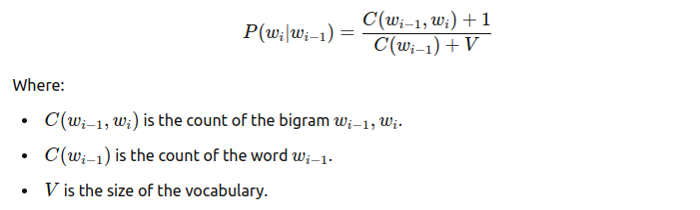

In [3]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/laplace.png')
new_image = img.resize((700, 210))
display(new_image)

```Working of Multinomial Naive Bayes```:
- consider binary classification problem
    - to classify ```email``` to be a ```Spam``` or ```Ham``` based on the text
- gather all the words associated against both the classes

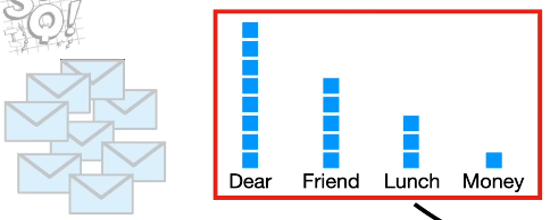

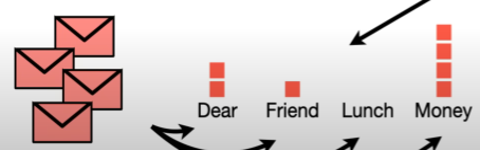

In [1]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/data.png')
new_image = img.resize((550, 220))
display(new_image)

img = Image.open('images/data1.png')
new_image = img.resize((480, 150))
display(new_image)

```Prior Probability```:
- classes Normal (N) & Spam (S)
- calculate ```prior probability``` i.e. probability of each output class labels against overall data points/records
    
    - ```P(N) = 8/12 = 0.67```
    
    - ```P(S) = 4/12 = 0.33```

- these probabilities are called prior probabilities 
    - the ```probabiltiy of seeing the evidence, given the hypothesis is true``` 

- now we calculate the ```likelihood of each word``` w.r.t ```normal``` output class
   
    - ```P(Dear|N) = 8/17 = 0.47```
   
    - ```P(Friend|N) = 5/17 = 0.29```
   
    - ```P(Lunch|N) = 3/17 = 0.18```
    
    - ```P(Money|N) = 1/17 = 0.05```

- we also calculate the ```likelihood``` of each word w.r.t ```spam``` output class
    
    - ```P(Dear|S) = 2/7 = 0.29```
    
    - ```P(Friend|S) = 1/7 = 0.14```
    
    - ```P(Lunch|S) = 0/7 = 0```
    
    - ```P(Money|S) = 4/7 = 0.57```

- the above probabilities are also called as likelihoods while taking the probabilities of the discrete variables/values
    - the ```probabiltiy of the hypothesis being true without any evidence present```

Note:
- here we do not calculate the ```marginal probability```, i.e. ```probability of observing the evidence``` 

```Prediction```:
- Eg 1:
    - test input data: ```"Dear Friend"```
    - calculate the ```posterior probabilities``` for each class of the test data "Dear Friend" using bayes theorem

        - ```P(Dear Friend|N) = P(Dear|N) * P(Friend|N) * P(N) = 0.47 * 0.29 * 0.67 = 0.09```

        - ```P(Dear Friend|S) = P(Dear|S) * P(Friend|S) * P(S) = 0.29 * 0.14 * 0.33 = 0.01```

    - compare the ```posterior probability``` values for both classes and choose the one with highest value

        - ```Dear Friend = Normal class```

- Eg 2:
    - test input data
    
        - ```"Lunch Money Money Money Money"```

    - calculate the ```posterior probabilities``` for each class of the test data "Lunch Money Money Money Money" using bayes theorem

        - ```P(Lunch Money Money Money Money|N) = P(Lunch|N) * P(Money|N) * P(Money|N) * P(Money|N) * P(Money|N) * P(N)``` 
            
            ```= 0.18 * 0.05 * 0.05 * 0.05 * 0.05 * 0.67```
            
            ```= 0.000002```

        - ```P(Lunch Money Money Money Money|S) = P(Lunch|S) * P(Money|S) * P(Money|S) * P(Money|S) * P(Money|S) * P(S)```
            
            ```= 0 * 0.05 * 0.05 * 0.05 * 0.05 * 0.33```
            
            ```= 0```
    
    - compare the ```posterior probability``` values for both classes and choose the one with highest value
        - ```Lunch Money Money Money Money = Normal class``` (but its a spam)
    - due to ```zero probability```, ```likelihood value``` for certain words is ```0```, therefore the ```posterior probability``` value becomes ```0```
    - to overcome zero probability perform ```additive laplace smoothing``` or ```"add-one" smoothing```
        - ```adding each word count by 1``` or any ```constant number```
        - ensure the alpha value in laplace smoothing is assigned properly
            - ```↑ alpha``` = underfitting
                - then the output probability of both the classes will be closer to 0.5
            - ```↓ alpha``` = overfitting

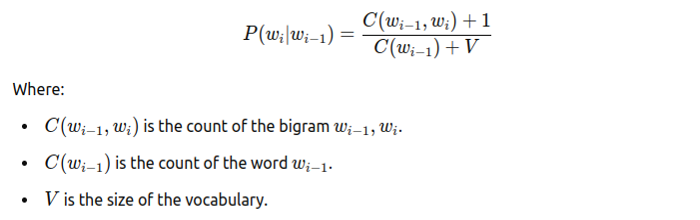

In [18]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/laplace.png')
new_image = img.resize((700, 220))
display(new_image)

```Post Laplace Smooothing```:
- calculate ```likelihood``` of each word w.r.t ```normal``` output class

    - ```P(Dear|N) = 9/21 = 0.43```
    
    - ```P(Friend|N) = 6/21 = 0.29```
    
    - ```P(Lunch|N) = 4/21 = 0.19```
    
    - ```P(Money|N) = 2/21 = 0.1```

- calculate the ```likelihood``` of each word w.r.t ```spam``` output class
    
    - ```P(Dear|S) = 3/11 = 0.29```
    
    - ```P(Friend|S) = 2/11 = 0.18```
    
    - ```P(Lunch|S) = 1/11 = 0.09```
    
    - ```P(Money|S) = 5/11 = 0.45```

- calculate ```posterior probability```,

    - ```P(Lunch Money Money Money Money|N) = P(Lunch|N) * P(Money|N) * P(Money|N) * P(Money|N) * P(Money|N) * P(N)```
        
        ```= 0.19 * 0.1 * 0.1 * 0.1 * 0.1 * 0.67 = 0.00001```
    
    - ```P(Lunch Money Money Money Money|S) = P(Lunch|S) * P(Money|S) * P(Money|S) * P(Money|S) * P(Money|S) * P(S)```
        
        ```= 0.09 * 0.45 * 0.45 * 0.45 * 0.45 * 0.33 = 0.00122```

- Now, ```"Lunch Money Money Money Money" = Spam``` using the laplace smoothing for words which had likelihood values = 0

Params:
- ```class_prior```: 
    - Without class priors, for example, if your training data has 80 samples of Class A and 20 samples of Class B, the estimated priors will be P(A)=0.8 and P(B)=0.2.
    - When you provide a value for class_prior, you pass a list or array of probabilities, one for each class, that must sum to 1.
    - the model uses these values as P(C) instead of calculating them from the data frequencies.

```Overfitting```:
- ↓ α = overfitting
- rare/irrelevant words
- high dimensional data
- small dataset with sparse features

```Underfitting```:
- ↑ α = smoothing parameter
- small size dataset
- imbalanced dataset
- aggressive feature selection
- zero probability with no smoothing